<div style="background-color: #707A33; color: white; padding: 10px; border: 2px solid #000000;">
  
# SQL Server and Python
    
</div>

<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 1a - Run a query of your choice inside of Python:

 - your query should use 2 tables or more from UA_Hallux_5103
 - use the read_sql_query method in Pandas (see slides for examples)
 - Load the data into a New Pandas DataFrame named df_query_results
 - YOU DO NOT NEED TO CHANGE ANYTHING IN THE CONNECTION STRING 
 - ... means you need to fill in with code

    
</div>   


In [81]:
import pyodbc
import pandas as pd
import plotly.express as px

In [82]:

# set up connection variables
# do not change the arguments for the parameters for the connection
svr = ""
uid = ""
pwd = ""
db = ""

# Connect to the database using pyodbc
cnxn = pyodbc.connect('DRIVER={ODBC Driver 18 for SQL Server}; SERVER='+svr+'; DATABASE='+db+'; UID='+uid+'; PWD='+pwd+'; TrustServerCertificate=yes;')

# Define the SQL command
sql_query = '''SELECT b.Band_Name, b.ZIP_Code , AVG(c.Album_Rev_Pct) AS Avg_Album_Rev_Pct FROM album a
INNER JOIN band b ON a.Band_Id = b.Band_Id
INNER JOIN Contract c ON b.Band_Id = c.Band_Id
GROUP BY b.band_name, b.zip_code
ORDER BY Avg_Album_Rev_Pct DESC '''

# Use Pandas to run the SQL query and save the result in a DataFrame
df_query_results = pd.read_sql_query(sql_query, cnxn)

# Close the connection to the database
cnxn.close()

df_query_results

  

/usr/local/lib64/python3.8/site-packages/pandas/io/sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,Band_Name,ZIP_Code,Avg_Album_Rev_Pct
0,The Sage Players ...,08879,0.15
1,Abhorrent Jacob ...,11718,0.15
2,Gang Wang ...,21220,0.15
3,The Merciful Televisions ...,29635,0.15
4,Brianna Stewart ...,30741,0.15
...,...,...,...
395,The Inoue Project ...,89108,0.05
396,Cheerful Jie ...,90221,0.05
397,Anthony And The Winters ...,94559,0.05
398,Cowardly Galaxy ...,98387,0.05


<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 1b - Run a stored procedure inside of Python:

 - Use the store procedure named [dbo].[usp_hw3c_perf_state_abbr] located in UA_Hallux_5103
 - It has 2 parameters (@Year, @State_Abbr) which you will need to hard code variables for to test
 - Load the data into a New Pandas DataFrame named df_stored_procedure_results
 - ... means you need to fill in with code
    
</div>   

In [83]:
# set up connection variables
# do not change the arguments for the parameters for the connection
svr = "essql1.walton.uark.edu"
uid = "ua_hallux_user"
pwd = "GohogsUA1"
db = "ua_hallux_5103"

# Connect to the database using pyodbc
cnxn = pyodbc.connect('DRIVER={ODBC Driver 18 for SQL Server}; SERVER='+svr+'; DATABASE='+db+'; UID='+uid+'; PWD='+pwd+'; TrustServerCertificate=yes;')

# Define the stored procedure and parameters
stored_procedure = "exec [dbo].[usp_hw3c_perf_state_abbr] @Year =?, @State_Abbr =?"
# Prompt the user to enter the Year and State_Abbr
Year = input("Enter the Year (YYYY) or All: ")
State_Abbr = input("Enter State Abbreviation or All: ")

# Use pandas to run the stored procedure with the parameters and save the result in a DataFrame
df_stored_procedure_results = pd.read_sql_query(stored_procedure, cnxn, params=[Year, State_Abbr])

# Close the connection to the database
cnxn.close()

df_stored_procedure_results


Enter the Year (YYYY) or All:  All
Enter State Abbreviation or All:  All


/usr/local/lib64/python3.8/site-packages/pandas/io/sql.py:761: UserWarning:

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy



,Performance_Year,State_Abbr,Venue_Name,Total Revenue
0,1998,AL,Patton Road Bar and Grill ...,247454.15
1,1998,AL,Sixth Road Bar ...,60027.01
2,1998,AR,Amar's Bar and Grill ...,159987.34
3,1998,AR,Ayaka's on Henry ...,41782.43
4,1998,AR,Jessica's on Wilson ...,65769.97
...,...,...,...,...
1795,2015,WA,Henry Boulevard Bar ...,78985.24
1796,2015,WA,Jessica's on Monroe ...,101064.05
1797,2015,WA,Nicholas's on Arthur ...,67332.93
1798,2015,WI,Chan's on Lemon ...,86290.03


<div style="background-color: #707A33; color: white; padding: 10px; border: 2px solid #000000;">
  
# Get External Data
    
</div>

<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 2 - Get external data from API:

 - Use the DataUSA.io API to pull in the measure named "Median Household Income" (note - it is case sensitive!)
 - Modify the EndPoint (URL) to accept the parameters population_year and measure_name. The values are currently hardcoded
 - Load the data into a New Pandas DataFrame named df_state_measure
    
</div>   

In [84]:
import pandas as pd
import requests

population_year = '2014'
measure_name = 'Median Household Income'

response = requests.get(f'https://datausa.io/api/data?drilldowns=State&measures={measure_name}&Year={population_year}')

if response.ok:
    state_pop = response.json()
else:
    print(f'Request was not successful and returned code: {response.status_code}.')
    state_pop = None

df_state_measure = pd.DataFrame(state_pop['data'])

df_state_measure


,ID State,State,ID Year,Year,Median Household Income,Slug State
0,04000US01,Alabama,2014,2014,41610,alabama
1,04000US02,Alaska,2014,2014,66503,alaska
2,04000US04,Arizona,2014,2014,47796,arizona
3,04000US05,Arkansas,2014,2014,40151,arkansas
4,04000US06,California,2014,2014,58322,california
5,04000US08,Colorado,2014,2014,56880,colorado
6,04000US09,Connecticut,2014,2014,67275,connecticut
7,04000US10,Delaware,2014,2014,58326,delaware
8,04000US12,Florida,2014,2014,45006,florida
9,04000US13,Georgia,2014,2014,47125,georgia


<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 3 - Crosswalk the State Name and State Abbreviation:

 - Step 1: in the markdown cell below, explain the capabilities of the Python Library US (https://pypi.org/project/us/)
 - Step 2: run the CODE cell below your answer. I put together the code for you.
 - Note: We used web scraping to get this in the PowerPoint, but, we can accomplish this in many ways.  Even creating our own Python dictionary.
    
</div>  


Type your answer here (note - remember to run the code cell below): 

- The us library provides access to U.S. state names, abbreviations, FIPS codes, capitals, and nicknames.

- It supports reverse lookups using state name, abbreviation, or FIPS code.

- The library includes U.S. territories (e.g., Puerto Rico, Guam) and can group states (e.g., contiguous states).

- It is useful for data cleaning, validation, and geographic analysis involving state-related metadata.

In [85]:
!pip install us
import us

print("Library imported successfully!")

12349.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
Library imported successfully!


In [86]:
import pandas as pd
import us  # this is a new library you can use when working with State data (State Names, Abbreviations, Zip Codes, FIPS, etc)

# Creating a list of tuples (full state name, abbreviation)
states = [(state.name, state.abbr) for state in us.states.STATES]

# Converting the list into a DataFrame
df_state_crosswalk = pd.DataFrame(states, columns=['State Name', 'Abbreviation'])

df_state_crosswalk = df_state_crosswalk.rename(columns={'State Name':'State'})

df_state_crosswalk

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


<div style="background-color: #707A33; color: white; padding: 10px; border: 2px solid #000000;">
  
# JOIN Data
    
</div>

<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 4a - Merge/JOIN DataFrames (df_state_measure and df_state_crosswalk)

 - Step 1 - Merge the two DataFrames together into a New DataFrame (merged_df_state_measure) using INNER
 - Step 2 - Use the "State" and "State Name" fields from each of the DataFrames as your KEY/LINK 
 - ... means you need to fill in with code
    
</div>   

In [87]:
merged_df_state_measure = pd.merge(df_state_measure, df_state_crosswalk, 
                                   on='State', how='inner') 

merged_df_state_measure



,ID State,State,ID Year,Year,Median Household Income,Slug State,Abbreviation
0,04000US01,Alabama,2014,2014,41610,alabama,AL
1,04000US02,Alaska,2014,2014,66503,alaska,AK
2,04000US04,Arizona,2014,2014,47796,arizona,AZ
3,04000US05,Arkansas,2014,2014,40151,arkansas,AR
4,04000US06,California,2014,2014,58322,california,CA
5,04000US08,Colorado,2014,2014,56880,colorado,CO
6,04000US09,Connecticut,2014,2014,67275,connecticut,CT
7,04000US10,Delaware,2014,2014,58326,delaware,DE
8,04000US12,Florida,2014,2014,45006,florida,FL
9,04000US13,Georgia,2014,2014,47125,georgia,GA


<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 4b - Merge/JOIN DataFrames (merged_df_state_measure and df_stored_procedure_results)

 - Step 1 - Merge the two DataFrames together into a New DataFrame (merged_df_state_measure) using INNER
 - Step 2 - Use the "Abbreviation" and "State_Abbr" fields from each of the DataFrames as your KEY/LINK 
 - ... means you need to fill in with code
    
</div>   

In [88]:
# renaming the column for the merge purpose
df_stored_procedure_results = df_stored_procedure_results.rename(columns={'State_Abbr':'Abbreviation'})
df_stored_procedure_results

merged_df = pd.merge(df_stored_procedure_results, merged_df_state_measure, 
                                   on='Abbreviation', how='inner') 

merged_df



,Performance_Year,Abbreviation,Venue_Name,Total Revenue,ID State,State,ID Year,Year,Median Household Income,Slug State
0,1998,AL,Patton Road Bar and Grill ...,247454.15,04000US01,Alabama,2014,2014,41610,alabama
1,1998,AL,Sixth Road Bar ...,60027.01,04000US01,Alabama,2014,2014,41610,alabama
2,1999,AL,Patton Road Bar and Grill ...,112844.28,04000US01,Alabama,2014,2014,41610,alabama
3,1999,AL,Sixth Road Bar ...,190690.28,04000US01,Alabama,2014,2014,41610,alabama
4,2000,AL,Patton Road Bar and Grill ...,191304.23,04000US01,Alabama,2014,2014,41610,alabama
...,...,...,...,...,...,...,...,...,...,...
1759,2013,WI,Cristina's on Henry ...,487866.05,04000US55,Wisconsin,2014,2014,51063,wisconsin
1760,2014,WI,Chan's on Lemon ...,540528.60,04000US55,Wisconsin,2014,2014,51063,wisconsin
1761,2014,WI,Cristina's on Henry ...,510186.50,04000US55,Wisconsin,2014,2014,51063,wisconsin
1762,2015,WI,Chan's on Lemon ...,86290.03,04000US55,Wisconsin,2014,2014,51063,wisconsin


In [89]:
regions = {
    'NY': 'Northeast', 'CA': 'West', 'TX': 'South', 'FL': 'South', 'PA': 'Northeast', 'IL': 'Midwest',
    'OH': 'Midwest', 'GA': 'South', 'NC': 'South', 'MI': 'Midwest', 'NJ': 'Northeast', 'VA': 'South',
    'WA': 'West', 'AZ': 'West', 'MA': 'Northeast', 'TN': 'South', 'IN': 'Midwest', 'MO': 'Midwest',
    'MD': 'Northeast', 'WI': 'Midwest', 'CO': 'West', 'MN': 'Midwest', 'AL': 'South', 'LA': 'South',
    'KY': 'South', 'OR': 'West', 'OK': 'South', 'SC': 'South', 'KS': 'Midwest', 'NE': 'Midwest',
    'UT': 'West', 'IA': 'Midwest', 'NV': 'West', 'CT': 'Northeast', 'MS': 'South', 'AR': 'South',
    'NM': 'West', 'ID': 'West', 'HI': 'West', 'MT': 'West', 'WY': 'West', 'DE': 'Northeast', 'AK': 'West',
    'SD': 'Midwest', 'ND': 'Midwest', 'VT': 'Northeast', 'RI': 'Northeast', 'ME': 'Northeast', 'DC': 'Northeast',
    'PR': 'South', 'NH': 'Northeast'
}

# Assuming 'df' is your DataFrame and 'STATE_ABBR' is the column with state abbreviations
merged_df['Region'] = merged_df['Abbreviation'].map(regions)
merged_df

,Performance_Year,Abbreviation,Venue_Name,Total Revenue,ID State,State,ID Year,Year,Median Household Income,Slug State,Region
0,1998,AL,Patton Road Bar and Grill ...,247454.15,04000US01,Alabama,2014,2014,41610,alabama,South
1,1998,AL,Sixth Road Bar ...,60027.01,04000US01,Alabama,2014,2014,41610,alabama,South
2,1999,AL,Patton Road Bar and Grill ...,112844.28,04000US01,Alabama,2014,2014,41610,alabama,South
3,1999,AL,Sixth Road Bar ...,190690.28,04000US01,Alabama,2014,2014,41610,alabama,South
4,2000,AL,Patton Road Bar and Grill ...,191304.23,04000US01,Alabama,2014,2014,41610,alabama,South
...,...,...,...,...,...,...,...,...,...,...,...
1759,2013,WI,Cristina's on Henry ...,487866.05,04000US55,Wisconsin,2014,2014,51063,wisconsin,Midwest
1760,2014,WI,Chan's on Lemon ...,540528.60,04000US55,Wisconsin,2014,2014,51063,wisconsin,Midwest
1761,2014,WI,Cristina's on Henry ...,510186.50,04000US55,Wisconsin,2014,2014,51063,wisconsin,Midwest
1762,2015,WI,Chan's on Lemon ...,86290.03,04000US55,Wisconsin,2014,2014,51063,wisconsin,Midwest


In [90]:
merged_df.info()
merged_df.dtypes
merged_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 0 to 1763
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Performance_Year         1764 non-null   int64  
 1   Abbreviation             1764 non-null   object 
 2   Venue_Name               1764 non-null   object 
 3   Total Revenue            1764 non-null   float64
 4   ID State                 1764 non-null   object 
 5   State                    1764 non-null   object 
 6   ID Year                  1764 non-null   int64  
 7   Year                     1764 non-null   object 
 8   Median Household Income  1764 non-null   int64  
 9   Slug State               1764 non-null   object 
 10  Region                   1764 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 165.4+ KB


Performance_Year           0
Abbreviation               0
Venue_Name                 0
Total Revenue              0
ID State                   0
State                      0
ID Year                    0
Year                       0
Median Household Income    0
Slug State                 0
Region                     0
dtype: int64

<div style="background-color: #707A33; color: white; padding: 10px; border: 2px solid #000000;">
  
# Visualize Data
    
</div>

<div style="background-color: whitesmoke; padding: 10px;border: 2px solid #000000;">
    
## Question 5 - Using Pandas, Matplotlib or Seaborn, create a pivot table or chart of your choice using your merged_df DataFrame

 - you may want to go back and reference the PowerPoint and your Assignment for Lesson 1e
 - you may want to create a binned field or grouper field to make the chart more readable
 - ... means you need to fill in with code
</div>   

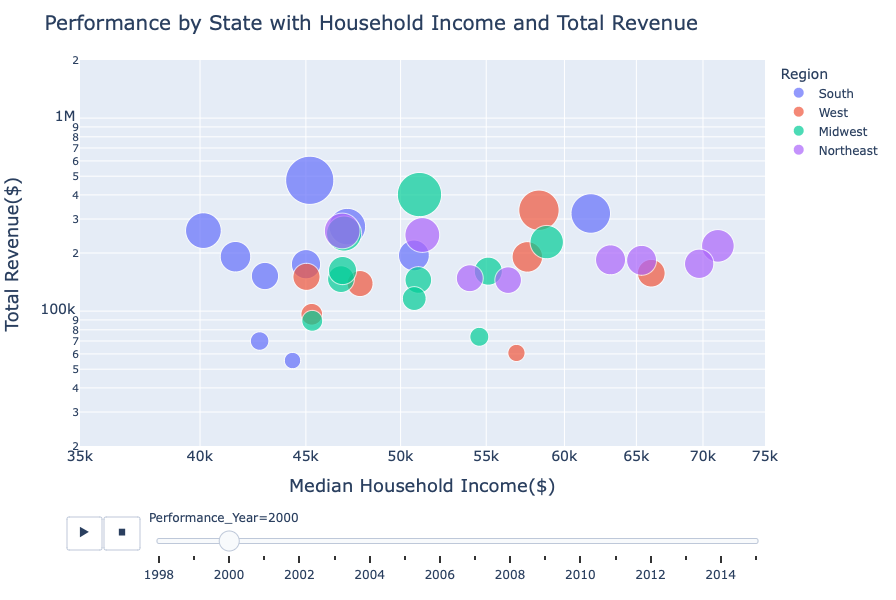

In [93]:
# Dataframe for the visualization
df = pd.DataFrame(merged_df)

# Create the scatter plot with animation and log scales
fig = px.scatter(df, 
                 x="Median Household Income", 
                 y="Total Revenue", 
                 animation_frame="Performance_Year", 
                 animation_group="State",
                 size="Total Revenue", 
                 color="Region", 
                 hover_name="State",
                 log_x=True, 
                 log_y=True, 
                 size_max=55, 
                 range_x=[35000, 75000], 
                 range_y=[20000, 2000000])

# Customize the layout for larger chart size and enhanced readability
fig.update_layout(
    width=1050,  # Chart width
    height=600,  # Chart height
    title={
        'text': "Performance by State with Household Income and Total Revenue",
        'font': {'size': 20}, # title font size 
       
    },
    xaxis=dict(
        title="Median Household Income($) ",
        titlefont=dict(size=18),  # x-axis title font size
        tickfont=dict(size=14),  # x-axis tick font size
    ),
    yaxis=dict(
        title="Total Revenue($) ",
        titlefont=dict(size=18),  # y-axis title font size
        tickfont=dict(size=14),  # y-axis tick font size
    ),
)

# Show the plot
fig.show()
